<h1> <center>Heart Disease UCI</center> </h1>

In [102]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import data

In [103]:
df = pd.read_csv('../data/raw/heart.csv')

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [105]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [106]:
# Good! we have a clean data. 

In [107]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
94,45,0,1,112,160,0,1,138,0,0.0,1,0,2,1
26,59,1,2,150,212,1,1,157,0,1.6,2,0,2,1
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2,1


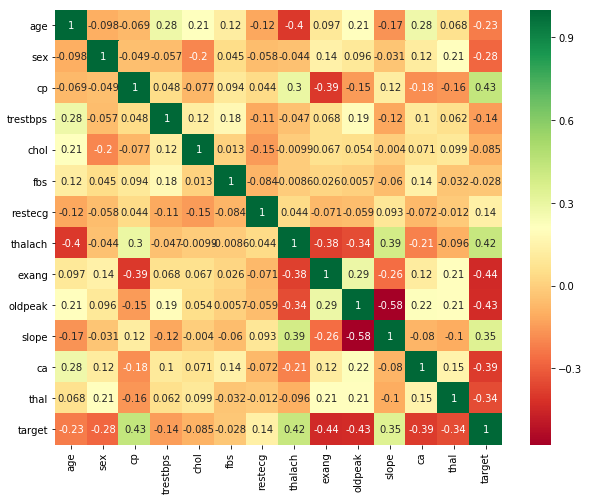

In [108]:
# let's see the correlation matrix
fig,ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn');

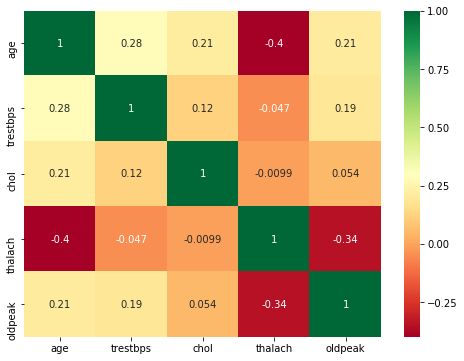

In [109]:
# let's see the corr() of only contineous data
catv = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
contv = ['age','trestbps','chol','thalach','oldpeak']
fig,ax = plt.subplots(figsize=(8,6))
sns.heatmap(df[contv].corr(),annot=True,cmap='RdYlGn');

In [110]:
# Looking the unique values of target
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [111]:
# Good! it has almost 50% +/- samples. let's choose this as out target vector

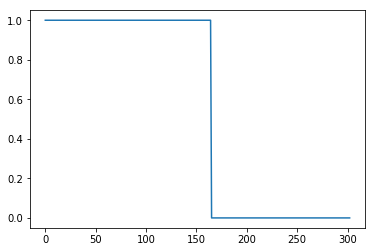

In [112]:
plt.plot(df['target'])

In [113]:
# wow! look at the step function like plot of target variable 
# let's resample the df and make our 

In [114]:
df = df.sample(frac=1.0)
x = df.drop(['target'],axis=1)
y = df['target']

In [122]:
# checking feature importance
from sklearn.ensemble import RandomForestClassifier

RFCmodel= RandomForestClassifier(n_estimators=100,random_state=0)
RFCmodel.fit(x,y)
pd.Series(RFCmodel.feature_importances_,index=x.columns).sort_values(ascending=False)

cp          0.136989
oldpeak     0.120549
thalach     0.114992
ca          0.110767
thal        0.110122
age         0.086513
chol        0.077515
trestbps    0.072854
exang       0.056227
slope       0.049881
sex         0.031548
restecg     0.021340
fbs         0.010703
dtype: float64

In [120]:
# Let's train some supervise model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [121]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [131]:
# evaluating multiple models
abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),
        KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier()]
for i in models:
    model = i
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    abc.append(metrics.accuracy_score(prediction,y_test))

In [140]:
models_dataframe=pd.DataFrame({'abc':abc},index=classifiers)
models_dataframe.sort_values(by=['abc'],ascending=False)

,abc
Linear Svm,0.885246
Logistic Regression,0.836066
Decision Tree,0.721311
KNN,0.557377
Radial Svm,0.491803


In [141]:
# if we do a feature standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [142]:
# evaluating multiple models
abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),
        KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier()]
for i in models:
    model = i
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    abc.append(metrics.accuracy_score(prediction,y_test))

In [143]:
models_dataframe=pd.DataFrame({'abc':abc},index=classifiers)
models_dataframe.sort_values(by=['abc'],ascending=False)

,abc
Linear Svm,0.885246
Logistic Regression,0.852459
Radial Svm,0.803279
KNN,0.803279
Decision Tree,0.721311


In [146]:
# hmmm! Radial SVM and KNN improved a lot
# Decision Tree did'n changed at all and so does Linear SVM

In [153]:
# Let's see what happens if we take only 8 important features
['cp', 'oldpeak', 'thalach', 'ca', 'thal', 'age', 'chol', 'trestbps', 'exang'] 
x8 = df[['cp', 'oldpeak', 'thalach', 'ca', 'thal', 'age', 'chol', 'trestbps', 'exang']]
y8 = df['target']

In [154]:
X_train8,X_test8,y_train8,y_test8 = train_test_split(x8,y8,test_size=0.2)

In [157]:
# feature normalization
sc8 = StandardScaler()
X_train8 = sc8.fit_transform(X_train)
X_test8 = sc8.transform(X_test)

In [158]:
# evaluating multiple models
abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),
        KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier()]
for i in models:
    model = i
    model.fit(X_train8,y_train8)
    prediction=model.predict(X_test8)
    abc.append(metrics.accuracy_score(prediction,y_test8))

In [159]:
models_dataframe8=pd.DataFrame({'abc':abc},index=classifiers)
models_dataframe8.sort_values(by=['abc'],ascending=False)

,abc
Radial Svm,0.524590
KNN,0.524590
Linear Svm,0.491803
Logistic Regression,0.475410
Decision Tree,0.475410


In [160]:
# wao! Radial SVM got up on the list and overall score got reduced
# more the features the better it is 